# Math 76 HW4, Fall 2024

**Name:**

For all plots, make sure to include a title, x-axis label, and y-axis label.

For this assignment, you will first need to install CVXPY. Probably, running
```
pip install cvxpy
```
in your command line will work. Otherwise, see [here](https://www.cvxpy.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp # You will need to install the CVXPY library for this assignment

from hw4_helper_funcs import *

# Problem 1

Problem 5.1 in the textbook (Discrete Inverse Problems).

## Part A
The purpose of this exercise is to illustrate the sensitivity of the discrepancy principle to variations of the estimate of the error norm. First generate the `shaw` test problem for $n = 100$, and add Gaussian noise with standard deviation $\eta = 10^{-3}$ to the right-hand side.

In [2]:
# Generate the shaw problem
n = 100
A, b_true, x_true = shaw(n)

# Add noise to the RHS
np.random.seed(0)
eta = 
err_vec = 
err_vec_norm = 
b_noisy = 

## Part B

Use the discrepancy principle to compute the Tikhonov solution. The discrepancy principle is implemented in the MATLAB function `discrep` from `hw4_helper_funcs.py`. This function may occasionally have convergence problems; if this happens, then create a new noise realization (or change $\eta$ slightly) and try again.

You should first use the "safety factor" $\nu_{\text{dp}} = 1$. As the “right-hand side” $\|\mathbf{e}\|_2$ in
$$
\| \mathbf{A} \mathbf{x}_{\lambda} - \mathbf{b} \|_2 = \nu_{\text{dp}} \| \mathbf{e} \|_2,
$$
try to use both the norm estimate $\sqrt{n} \eta$ and the actual 2-norm $\| \mathbf{e} \|_2$ of the perturbation vector $\mathbf{e}$ (perhaps try with different perturbations). Is
there a significant difference in the results?

In [3]:
# SVD of A
U, s, V = csvd(A)

# Compute DP solution with \nu_{dp} = 1
x_tikh_1, dp_lambdah_1 = discrep(U, s, V, b_noisy, err_vec_norm)

# Compute DP solution with \sqrt{n} \eta as the norm estimate
x_tikh_2, dp_lambdah_2 = discrep(U, s, V, b_noisy, np.sqrt(n)*eta)


In [3]:
plt.plot(x_true, label="Ground truth")
plt.plot(b_noisy, label="Noisy problem data")
plt.plot(x_tikh_1, label="DP solution using $\| \\mathbf{e} \|_2$", ls="--")
plt.plot(x_tikh_2, label="DP solution using $\sqrt{n} \eta$", ls=":")
plt.legend()
plt.title("Comparison")
plt.xlabel("index")
plt.show()

**Response:**

## Part C

Still with the "safety" factor $\nu_{\text{dp}} = 1$, use several values of $\sqrt{n} \eta$ and/or $\| \mathbf{e} \|_2$ that are slightly too large and slightly too small; this simulates a situation where only a rough estimate is available. For example, scale $\sqrt{n} \eta$ and/or $\| \mathbf{e} \|_2$ up and down by 5-10\%. How sensitive is the regularized solution to overestimates and underestimates of the noise level?

In [5]:
# For your convenience, I have defined a function that computes the optimal regularization 
# parameter by minimizing || x_lambda - x_true ||_2. You can utilize this in your analysis if you wish.
# For some inspiration, see Chapter 5 of Hansen.

opt_x_tikh, opt_lambdah = determine_optimal_lambdah(A, b_noisy, x_true)

In [ ]:
### Your code here

**Response:**

# Part D

Finally, repeat the experiments with the "safety factor" $\nu_{\text{DP}} = 2$, and comment on the results. 

In [10]:
### Your code here

**Response:** 

# Problem 2

In this problem, we will consider the reconstruction of two functions:


*(1) Sparse signal*: a sparse signal $\mathbf{f}$ where $\mathbf{f} \in \mathbb{R}^n$. Here you may vary the size and sparsity of the signal. For your convenience, you may use the helper function `gen_sparse_signal` from `hw4_helper_funcs.py`.

*(2) Piecewise constant signal*: the piecewise constant function $f$ discretized on $[-1,1]$ given by
$$
f(t) = \begin{cases} 
    1 & \text{if } -\frac{1}{4} < t \geq 0, \\
    2 & \text{if } \frac{1}{2} \leq t \leq \frac{7}{8}, \\
    0 & \text{else}.
\end{cases}
$$
Here we discretize the function using grid points $t_j = -1 + \frac{2j}{n}$ to obtain the vector $\mathbf{f} = \operatorname{vec}(f(t_i))$.


Your task is to study and compare the reconstruction of the vector $\mathbf{f} = \operatorname{vec}(f(t_i))$ (for both the sparse and piecewise constant cases) using several different methods we have discussed:

a. Least squares: (use `least_squares_solver(A, lambdah)`)
$$
\operatorname{argmin}_{\mathbf{f} \in \mathbb{R}^n} \,\, \| \mathbf{A} \mathbf{f} - \mathbf{b} \|_2^2
$$
b. Tikhonov regularization: (use `tikhonov_reconstruction(n, A, lambdah, T="I")`)
$$
\operatorname{argmin}_{\mathbf{f} \in \mathbb{R}^n} \,\, \| \mathbf{A} \mathbf{f} - \mathbf{b} \|_2^2 + \lambda^2 \| \mathbf{f} \|_2^2
$$
c. Tikhonov regularization (with sparsifying transform): (use `tikhonov_reconstruction(n, A, lambdah, T="L")`)
$$
\operatorname{argmin}_{\mathbf{f} \in \mathbb{R}^n} \,\, \| \mathbf{A} \mathbf{f} - \mathbf{b} \|_2^2 + \lambda^2 \| \mathbf{L} \mathbf{f} \|_2^2
$$
d. $\ell_1$ (sparse signal) regularization: (use `l1_reconstruction(n, A, lambdah, T="I")`)
$$
\operatorname{argmin}_{\mathbf{f} \in \mathbb{R}^n} \,\, \| \mathbf{A} \mathbf{f} - \mathbf{b} \|_2^2 + \lambda \| \mathbf{f} \|_1
$$
e. TV regularization: (use `l1_reconstruction(n, lambdah, A, T="L")`)
$$
\operatorname{argmin}_{\mathbf{f} \in \mathbb{R}^n} \,\, \| \mathbf{A} \mathbf{f} - \mathbf{b} \|_2^2 + \lambda \| \mathbf{L} \mathbf{f} \|_1
$$
The matrix $\mathbf{L}$ is a discretization of the first derivative given by
$$
\mathbf{L} = \begin{bmatrix} -1 & 1 & &  \\  & \ddots & \ddots & \\  & & -1 & 1 \\ 1 & & & -1 \end{bmatrix} \in \mathbb{R}^{n \times n}.
$$

Here the matrix $\mathbf{A}$ represents a Gaussian blurring operation, meaning that we are given blurred data which we seek to deblur. The blurring operation is defined by parameters `n`, `m` and `blur_sigma` (width of the blurring kernel) -- for your convenience, you can construct $\mathbf{A}$ using the code block below:
```python
n = 200 # default choice, but you can vary
m = 6 # default choice, but you can very
sigma = 3 # variance of Gaussian blur, you can also try varying this
tmp = np.linspace(0,1,m+1) 
y = np.concatenate((-np.flip(tmp[1:]), tmp))
psf = np.exp(-y**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)
psf = psf/np.sum(psf)  # normalize blur
A = convmtx(psf,n).T # creates convolution matrix
A = A[:, (m):(-m)] # reduces A to a square matrix of n x n (zero boundary condition)
```

You can construct your (noisy) blurred observation data vector $\mathbf{b}$ using the block of code below:
```python
noise_level = 0.01 # default choice, you can vary this
np.random.seed(0) # set the random seed for reproducibility
b_true = A @ f
e = np.random.normal(A.shape[0])
e = e/np.linalg.norm(e)
noise = noise_level*e
b = b_true + noise
```

For both the sparse signal case (1) and the piecewise constant signal case (2), your task is to choose the regularization parameter λ for all five methods (a)-(e) based on the techniques discussed in class, such as the L-curve or the discrepancy principle. Since you know the underlying noise of the system, you can also choose λ using that information (see notes). It is also ok to guess at a choice of λ and then use trial and error to find the best one. Or you can use a combination of choices. Please comment on how you do this in your write up, and show the reconstructions from each method using your chosen λ's.

Write a short summary including figures of your results. What happens as you vary the amount of noise? What happens as you increase the amount of blur? Include graphs of the solutions for your discussion


In [14]:
# READ: this problem is very open-ended, so I do not provide a template for you. 
# However, below I show you how to set up the two test problem as well as call 
# my codes for every reconstruction method. Be creative!

# Sparse signal example
n = 200 # default choice, but you can vary
sparsity = 10 # default choice, but you can vary
f = generate_sparse_vector(n, sparsity)

# Piecewise constant example
n = 200 # default choice, but you can vary
f = piecewise_constant_function(n)

# Setup for the matrix A
m = 6 # default choice, but you can very
sigma = 3 # variance of Gaussian blur, you can also try varying this
tmp = np.linspace(0,1,m+1) 
y = np.concatenate((-np.flip(tmp[1:]), tmp))
psf = np.exp(-y**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)
psf = psf/np.sum(psf)  # normalize blur
A = convmtx(psf,n).T # creates convolution matrix
A = A[:, (m):(-m)] # reduces A to a square matrix of n x n (zero boundary condition)

# Generate the noisy RHS
noise_level = 0.01 # default choice, you can vary this
np.random.seed(0) # set the random seed for reproducibility
b_true = A @ f
e = np.random.normal(A.shape[0])
e = e/np.linalg.norm(e)
noise = noise_level*e
b = b_true + noise


# (a) Solving the least squares problem
x_lambdah = least_squares_solver(A, b)


# (b) Solving the Tikhonov problem with no transformation (L = I)
lambdah = 1.0
L = np.eye(n)
x_lambdah = solve_tikhonov(A, b, L, lambdah)


# (c) Solving the Tikhonov problem with transformation (smoothing regularization)
lambdah = 1.0
L = differencing_matrix(n)
x_lambdah = solve_tikhonov(A, b, L, lambdah)


# (d) L1 regularization (L1 with L = I) (sparse signal)
lambdah = 1.0
L = np.eye(n)
x_lambdah = solve_l1(A, b, L, lambdah)


# (e) TV regularization 
lambdah = 1.0
L = differencing_matrix(n)
x_lambdah = solve_l1(A, b, L, lambdah)

/Users/jonathanlindbloom/miniconda3/envs/jlinops/lib/python3.11/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


**Response:** 

# Problem 3

Repeat Problem 2 but for the third choice of the underlying function below.

*(3) Sawtooth function*: the function given by
$$
f(t) = \begin{cases} 
    - \pi - t & \text{if } -\pi < t \geq 0, \\
    \pi - t & \text{if }  t > 0.
\end{cases}
$$

In this case, you will want to use a periodic convolution matrix (see Hansen et al. textook Chapter 4).

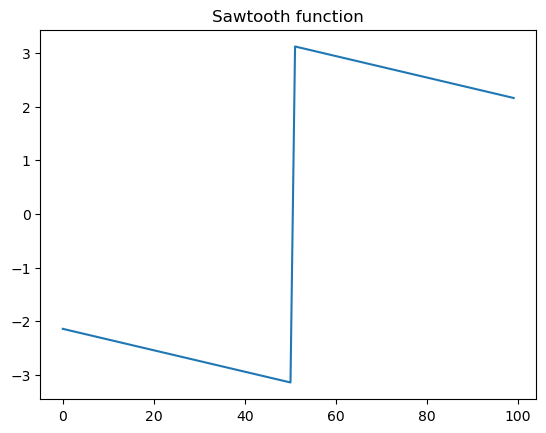

In [18]:
# You will need to construct your own periodic convolution matrix. 
# But for your convenience, I have already provided the sawtooth function.
n = 100
f = sawtooth_function(n)

plt.plot(f)
plt.title("Sawtooth function")
plt.show()

**Response:** 